<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

# Kwaterniony jako obiekty geometryczne - wizualizacja
<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Reprezentacja obrotów - liczby zespolone (2D) i kwaterniony (3D)
</div>

# Spis tresci:

1. [Wprowadzenie](#sec1)
2. [Liczby zespolone - obroty 2D](#sec2)
3. [Kwaterniony - obroty 3D](#sec3)


## 1. Wprowadzenie <a name="sec1"></a>

Na wstepnie kilka pomocnych źródeł na temat kwaternionów: 
- Interaktywny portal wizualizacji kwaternionów:  https://quaternions.online/
- https://www.youtube.com/watch?v=jTgdKoQv738
- https://eater.net/quaternions/

## 2. Liczby zespolone - obroty 2D <a name="sec2"></a>

#### Mnożenie przez i (jednostka urojona) - oznacza obrót o +90 stopni!

Liczby zespolone to po prostu liczby, można powiedzieć tak: 
+ liczby wynierne to rozszerzenie liczb całkowitych,
+ liczby zespolone to roższerzenie liczb wymiernych;
+ a kwaterniony to rozszerzenie liczb zespolonych.

Aby zrozumieć oraz spróbować wyobrazić sobie kwaterniony jako obiekty geometryczne, można zacząć od liczb zespolonych oraz ich wykorzystania w przestrzeni 2D. Liczby zespolone to wygodny sposób mówienia o dwóch przestrzeniach na raz (utożsamiając osie z jednostkami rzeczywistymi i urojonymi).
Skoro $ c = a + bi $ można interpretować geometrycznie jako punkt $(a, b) $ na płaszczyźnie. To jeśli ograniczymy to do $\sqrt{a ^ 2 + b ^ 2} = 1 $, to wszystkie takie punkty leżą na okręgu jednostkowym.

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


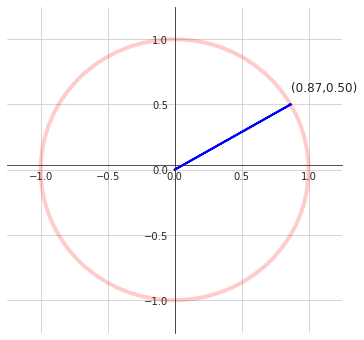

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

angle = np.pi/6 #in radians
c = np.cos(angle) + np.sin(angle)*1j

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


circle1=plt.Circle((0,0), 1, lw=4, alpha=.2, fill=False, color='r')
plt.gcf().gca().add_artist(circle1)

plt.arrow(0,0, c.real, c.imag, lw=2, color='b')

plt.text(c.real, c.imag+.1, '(%1.2f,%1.2f)'%(c.real, c.imag), fontsize=12)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

ax.yaxis.grid(True, which='major')          # generowanie gridu na osi y - oś liczb urojonych
ax.xaxis.grid(True, which='major')          # generowanie gridu na osi x - oś liczb rzeczywistych

sns.despine(offset=-168)
sns.set_style("white")

Tak więc, używanie liczb zespolonych do wskazania orientacji jest czymś, co już robimy w dwóch wymiarach. Ponieważ ograniczyliśmy to do koła jednostkowego, $c$ mówi nam, pod jakim kątem się obróciliśmy, aby dostać się do tego punktu.

Co więcej,  liczb zespolonych używamy również do określania obrotów w 2D. Na przykład, jeśli chcę obrócić liczbę zespoloną o 45 stopni, mogę zdefiniować wektor „obrotu/rotator” $r = \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2}i$, czyli po prostu wektor jednostkowy obrócony o 45 stopni od poziomu (skierowany w prawo), tj. $1 + 0i$ or $(1,0)$

Więc co robimy z naszym 'rotatorem'? Po prostu mnożymy. Więc $c * r $ jest nową liczbą zespoloną, która jest obrócona o 45 przeciwnie do ruchu wskazówek zegara od $ c $.

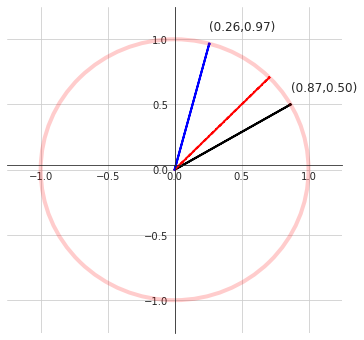

In [9]:
from math import radians
angle = np.pi/6 #in radians
c = np.cos(angle) + np.sin(angle)*1j

# dla kontroli wector obrócony o 65 stopni
#angle = radians(65) #in radians
#c = np.cos(angle) + np.sin(angle)*1j
#rotator
r = np.sqrt(2)/2 + np.sqrt(2)/2*1j

result = c*r

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

plt.arrow(0,0,c.real,c.imag, lw=2,color='k') # black:  kąt 20deg
plt.arrow(0,0,r.real,r.imag, lw=2,color='r', linestyle='--') # red:  rotator
plt.arrow(0,0,result.real,result.imag,lw=2,color='b') # blue: po obrocie 

circle1=plt.Circle((0,0),1,lw=4,alpha=.2,fill=False,color='r')
plt.gcf().gca().add_artist(circle1)
plt.text(c.real, c.imag+.1, '(%1.2f,%1.2f)'%(c.real, c.imag), fontsize=12)
plt.text(result.real, result.imag+.1, '(%1.2f,%1.2f)'%(result.real, result.imag), fontsize=12)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

ax.yaxis.grid(True, which='major')          # generowanie gridu na osi y
ax.xaxis.grid(True, which='major')          # generowanie gridu na osi x

sns.despine(offset=-168)
sns.set_style("white")


To stanowi podstawę dla tego, co już wiemy:
1. możemy interpretować liczby urojone jako obiekty geometryczne wskazujące kąty obrotu;
2. możemy zastosować obroty  wykonując mnożenie liczb zespolonych

Pamiętając, że wzór Eulera (użyty w powyższym kodzie) łączy „czyste” liczby zespolone z sinusami i cosinusami (postać trygonometryczna liczb zespolonychh), a także liczby zespolone z częściami rzeczywistymi i urojonymi  (postać wykładnicza liczb zespolonychh):

$e^{i\omega}=\cos(\omega)+i\sin(\omega)$

## 3. Kwaterniony - obroty 3D <a name="sec3"></a>

Tak jak liczby zepolone są rozszerzeniem liczb rzeczywistych, tak kwaterniony są rozszerzeniem liczb zespolonych. 
Analogicznie do obrotów na płaszczyźnie reprezentowanych przez liczby zespolone, możemy interpretować obroty w przestrzeni 3D za pomocą kwaternionionów.  
Co ciekawe, potrzebujemy do tego czterowymiarowego wektora (zamiast 2), aby przedstawić obroty 3D, (właściwości matematyczne kwaternionów). Więc nasz kwaternion zostaje zapisany jako:

$q = w +xi + yj +zk$

gdzie $w$ jest liczbą rzeczywistą, natomiast $i, j, k$  są wartościami urojonymi (utożsamiamy je z trzema osiami układu wspłrzędnych $x, y, z$). Ustawiając $w=0$ możemy łatwo zidentyfikować każdy wektor 3D z $q$.

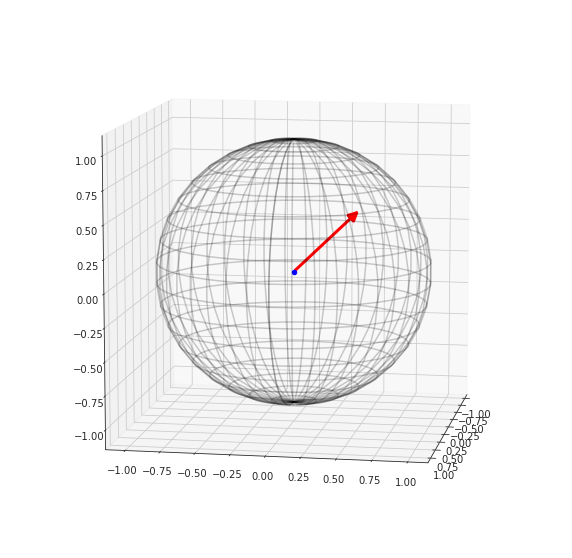

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')       
        
#rysuj sferę
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=.2)

ax.view_init(elev = 10, azim = 10)

#rysuj środek sfery
ax.scatter([0],[0],[0],color="b",s=20)

# !!!!!!!!!
# Zdefinuj kwaternion dla każdego wektora
#q = w + xi + yj + zk
q = [0, np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]

a = Arrow3D([0, q[1]], [0,q[2]], [0,q[3]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a);

Należy zauważyć, że powyższy zapis nie definiuje obrotów, ponieważ  3 liczby nie uwzględniają „przechyłu” wektora wokół własnej osi ($w=0)$. Właśnie dlatego potrzebujemy 4 liczb w kwaternionach. Trzy  liczby urojone (utorzsamione z osiami) do reprezentacji osi i jedna liczba rzeczywista do „obrót wokół osi” ('roll').

<IPython.core.display.Javascript object>


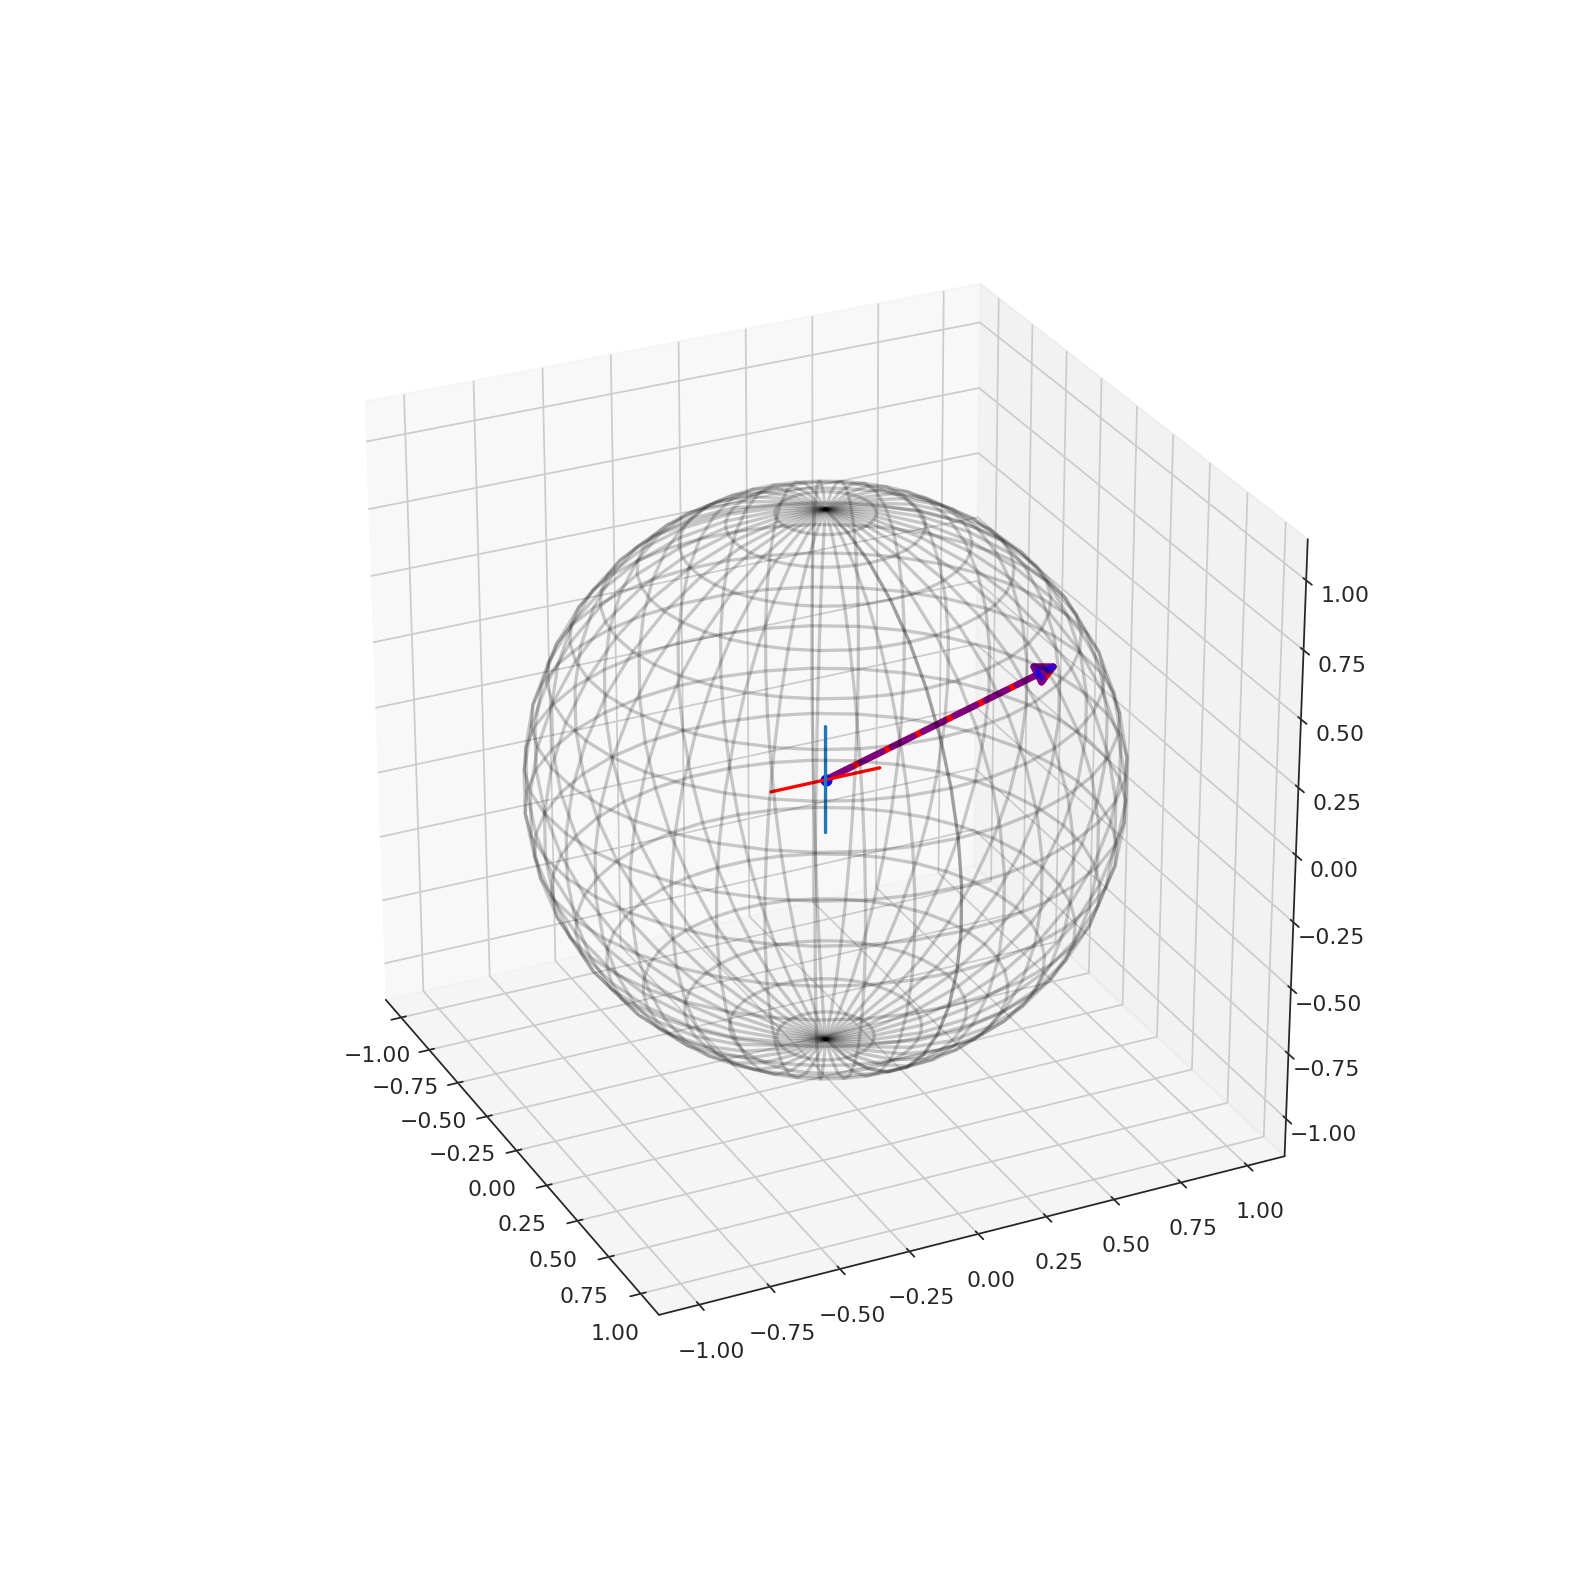

In [17]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')       
        
# rysuj sferę
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=.2)

ax.view_init(elev = 10, azim = 10)

# rysuj środek sfery
ax.scatter([0],[0],[0],color="b",s=20)

#zdefinuj mnożenie kwaternionów
def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

# Zdefinuj kwaternion sprzeżony (conjugate)
def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

#!!!!!!!!
#Zdefinuj kwaternion
q1 = [0, np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]

#zdefiniuj kwaternion do obrotu o 90 (90/2 = 45 > cos (45) = np.sqrt(2)/2) stopni wokół osi 
q2 = [np.sqrt(2)/2, np.sqrt(6)/6, np.sqrt(6)/6, np.sqrt(6)/6]

#q2 = [1/2, np.sqrt(6)/6, np.sqrt(6)/6, np.sqrt(6)/6]


# obróć pierwszy wektor względem drugiego używając mnożenia kwaternionów
v = q_mult(q_mult(q2, q1), q_conjugate(q2))[1:] 

# Rysuj częśc wektorową
a = Arrow3D([0, q[1]], [0,q[2]], [0,q[3]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
#Rysów "obrót wokół osi" (roll)
ax.plot([0,0],[-.2,.2],[0,0], color='r')

# Rysuj częśc wektorową
b = Arrow3D([0, v[0]], [0,v[1]], [0,v[2]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="b", alpha=.5,linestyle='--')
ax.add_artist(b)
#Rysów "obrót wokół osi" (roll)
ax.plot([0,0],[0,0],[-.2,.2])

<table style="width:40%" style="border: 1px solid black">
<tr><td><img src=Euler_AxisAngle.png></td></tr>
<tr><td>Rys: Oś Eulera (e) jest wektorową częścią kwaternionu, a obrót ($\theta $) jest częścią rzeczywistą</td></tr>
</table>

W związku z tym Euler wykazał (w swoim [twierdzeniu o obrotach] (https://en.wikipedia.org/wiki/Euler%27s_rotation_theorem)), że każdy obrót obiektu 3D można zdefiniować za pomocą osi (osi Eulera) i obrót (patrz rysunek). Nic więc dziwnego, że kwaterniony właśnie to reprezentują: osie (część urojona, wektorowa) i obrót (część rzeczywista).

Myśląc o kwaternionach, **bardzo ważne** jest, aby pamiętać, że nie obracamy wektora (ponieważ wektory nie mają "roll), tak naprawdę obracamy zestaw osi lub układ odniesienia (wyrównany z wektorem wzdłuż osi $x $ układu). 


<table style="width:40%" style="border: 1px solid black">
<tr><td><img src=rotate_reference.jpeg></td></tr>
<tr><td>Rys: Obracanie układu odniesienia. Zauważmy, że jeśli myślimy o $Z$ jako o wektorze obracanym o $\alpha $, to w rzeczywistości nie zmienia to zbytnio tego wektora, gdy widzimy $Z'$. Jednak w rzeczywistości każdy inny wektor nie równy $Z$ ulegnie zmianie. Na przykład $Y$ i $X$ zmieniają się całkiem sporo na $Y'$ i $X'$.</td></tr>
</table>

Oznacza to, że nie można myśleć o wektorowej części kwaternionu jako o wektorze prostopadłym do początkowego i końcowego wektora obrotu. Można to sobie wyobrazić, jako najkrótszą ścieżkę między dwoma wektorami, ale istnieją inne obroty, które mogą przenieść z jednego wektora do drugiego (każda ścieżka leżąca na powierzchni kuli zawierającej dwa wektory).

<table style="width:50%" style="border: 1px solid black">
<tr><td><img src=vector_rotate.png></td></tr>
<tr><td>Rys: Nie (koniecznie) Kwaternion!  Może być kuszące, aby pomyśleć, że $e$ jest wektorową częścią kwaternionu, ale jest to niepoprawne. **Zielony wektor jest prostopadłą osią, wokół której obróciłbyś czerwony wektor początkowy o $ \theta $, aby dostać się do niebieskiego wektora**. Jednak może to nie być użyteczna kwaternion, ponieważ ta charakterystyka ignoruje „roll” wektorów.</td></tr>
</table>

Zamiast tego, co jest na powyższym rysunku, lepiej jest pomyśleć o kwaternionie jako wektorze, który, gdy początkowe *osie* są obracane wokół niego, kończy się wyrównaniem z końcowymi *osiami* (patrz poniżej). Powodem, dla którego jest to ważne, jest to, że kiedy myślimy o tym w ten sposób, jest jaśniejsze, dlaczego cały *zestaw* punktów może zostać przesunięty o ten sam kwaternion. 
Nawiązując do poniższego rysunku, wyobraź sobie kulę wokół pierwszych osi. Tylko te punkty, które leżą na jej „równiku”, przesuną się najkrótszą możliwą drogą, aby dostać się do ostatecznej pozycji. Wszystko inne będzie przebiegać bardziej zakrzywioną trasą, niż jest to konieczne do odwzorowania tylko tego wektora początkowego na jego końcową pozycję.

<table style="width:30%" style="border: 1px solid black">
<tr><td><img src=axes.png></td></tr>
<tr><td>Rys: Rotacja kwaternionów. Czarna linia to oś Eulera i osie obracające się wokół niej. W zależności od tego, który punkt wybierzemy w pierwotnym układzie, można uzyskać bardzo różne ścieżki podczas obrotu.</td></tr>
</table>

Mając to na uwadze, będzie bardziej oczywiste, dlaczego po pomnożeniu kwaternionu przez wektor jednostkowy (tj. $V = [1,0,0] $) **nie** otrzymamy wektora, który jest wyrównany z kwaternionem, w przeciwieństwie do liczb zerpolonych 2D. Zamiast tego podąża za łukiem wokół tego kwaternionu i zatrzymuje się, gdy zajdzie tak daleko, jak mu wskazaliśmy.


That's about it.  There are lots of places to find out about the 'math' of quaternions.  E.g. how to multiply them (which I did in the code above) to generate a rotation, etc. for instance, in [wikipedia](https://en.wikipedia.org/wiki/Quaternion).

Ostatnia uwaga, zachowana jest również forma wzoru Eulera, gdzie $r = [xi + yj + zk]$ i $ \omega = \theta /2 $ 
($\theta $ to oznacza jak daleko chcesz obrócić o $r$, jak w przypadku 2D):

$e^{\omega r} =  \cos(\omega) + r\sin(\omega)$

Służy do konwersji między reprezentacjami obrotów osi i reprezentacjami kwaternionów.